In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
#from movies.txt import final_df

sample_df = pd.read_csv("SampleDataset.csv")
full_df = pd.read_csv("CompleteDataWithGenres.csv")

data = {'Movie':['1', '2', '3', '2', '4', '5', '1', '2', '6', '4'],
        'User': ['a', 'a', 'a', 'b', 'b', 'c', 'd', 'c', 'd', 'c']}
test = pd.DataFrame(data)

G = nx.Graph()

In [3]:
#a variation of an exising function to account for repeated nodes
def my_add_node(movie1,graph):
    if movie1 in graph:
        return
    else:
        graph.add_node(movie1)

In [4]:
        
#a variation of an existing function to account for repeated edges
def my_add_edge(movie1, movie2, graph):
    if graph.has_edge(movie1, movie2):
        graph[movie1][movie2]['weight'] += 1
    else:
        graph.add_edge(movie1, movie2, weight = 1)
 

In [7]:
def main(df):
    df = df.reset_index()
    for i in tqdm(range(df.shape[0])):
        mc = df.at[i, 'Movie']
        my_add_node(mc, G)
        uc = df.at[i, 'User']
        df = df.drop(index = i)
        dfl = df.loc[df['User'] == uc] 
        lst = dfl['Movie'].tolist()
        for j in lst:
            my_add_node(j, G)
            my_add_edge(mc, j, G)
 

In [8]:
main(test)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 587.20it/s]


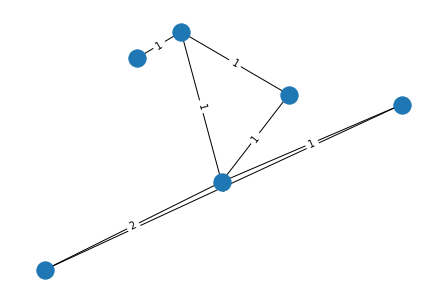

In [9]:
pos = nx.random_layout(G)
nx.draw(G, pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig('TestNetwork.png')
plt.show()

In [ ]:
t = time.time()
main(sample_df)
print(time.time()-t)
nx.write_weighted_edgelist(G, 'CompleteNetwork.csv')
        

In [ ]:
pos = nx.random_layout(G)
nx.draw(G, pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig('SampleNetwork.png')
plt.show()

In [ ]:
#this one tries to render the complete network
main(full_df) 